In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
pop = pd.read_csv('/content/Population by Race - US, States, Counties 3.csv')
pop = pop.drop('IBRC_Geo_ID', axis=1).drop('Statefips', axis=1).drop('Countyfips', axis=1).drop('Total Population', axis=1).drop('Not Hispanic', axis=1)
pop['Description'] = pop['Description'].str.upper()
pop

,Description,Year,White Alone,Black Alone,American Indian or Alaskan Native,Asian Alone,Hawaiian or Pacific Islander Alone,Two or More Races,Hispanic
0,ALABAMA,2003,3215079.0,1178398.0,25920.0,37929.0,2625.0,43540.0,103472.0
1,ALABAMA,2007,3308005.0,1227620.0,29666.0,48454.0,3996.0,55099.0,150652.0
2,ALABAMA,2011,3369252.0,1266978.0,32793.0,57527.0,5030.0,67489.0,189793.0
3,ALABAMA,2015,3372343.0,1297313.0,33332.0,67141.0,4916.0,77302.0,199684.0
4,ALABAMA,2019,3389396.0,1313291.0,34799.0,73715.0,5110.0,86874.0,223278.0
...,...,...,...,...,...,...,...,...,...
245,WYOMING,2003,476461.0,4330.0,12142.0,3361.0,412.0,6747.0,35424.0
246,WYOMING,2007,503310.0,4945.0,13562.0,4030.0,495.0,8534.0,43022.0
247,WYOMING,2011,531545.0,5494.0,14779.0,4832.0,496.0,10153.0,51479.0
248,WYOMING,2015,544435.0,7392.0,15830.0,5624.0,595.0,11737.0,56994.0


In [ ]:
pop_2003 = pop[pop['Year'] == 2003]
pop_2007 = pop[pop['Year'] == 2007]
pop_2011 = pop[pop['Year'] == 2011]
pop_2015 = pop[pop['Year'] == 2015]
pop_2019 = pop[pop['Year'] == 2019]

In [ ]:
pop_2003 = pop_2003.set_index('Description')
pop_2007 = pop_2007.set_index('Description')
pop_2011 = pop_2011.set_index('Description')
pop_2015 = pop_2015.set_index('Description')
pop_2019 = pop_2019.set_index('Description')

In [ ]:
pop_2003 = pop_2003.drop('Year', axis=1)
pop_2007 = pop_2007.drop('Year', axis=1)
pop_2011 = pop_2011.drop('Year', axis=1)
pop_2015 = pop_2015.drop('Year', axis=1)
pop_2019 = pop_2019.drop('Year', axis=1)

In [ ]:
pop_2003 = pop_2003.divide(pop_2003.sum(axis=1), axis=0)
pop_2007 = pop_2007.divide(pop_2007.sum(axis=1), axis=0)
pop_2011 = pop_2011.divide(pop_2011.sum(axis=1), axis=0)
pop_2015 = pop_2015.divide(pop_2015.sum(axis=1), axis=0)
pop_2019 = pop_2019.divide(pop_2019.sum(axis=1), axis=0)

In [ ]:
elec = pd.read_csv('/content/1976-2020-president.csv')
elec

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER


In [ ]:
elec = elec[elec['state'] != 'DISTRICT OF COLUMBIA']

In [ ]:
year_2004 = elec[elec['year'] == 2004]
year_2008 = elec[elec['year'] == 2008]
year_2012 = elec[elec['year'] == 2012]
year_2016 = elec[elec['year'] == 2016]
year_2020 = elec[elec['year'] == 2020]

In [ ]:
final_2004 = year_2004[['state', 'candidate', 'candidatevotes', 'totalvotes']]
final_2008 = year_2008[['state', 'candidate', 'candidatevotes', 'totalvotes']]
final_2012 = year_2012[['state', 'candidate', 'candidatevotes', 'totalvotes']]
final_2016 = year_2016[['state', 'candidate', 'candidatevotes', 'totalvotes']]
final_2020 = year_2020[['state', 'candidate', 'candidatevotes', 'totalvotes']]

In [ ]:
pivot_2004 = final_2004.pivot_table(index='state', columns='candidate', values='candidatevotes', aggfunc='sum')
pivot_2004 = pivot_2004.fillna(0)

pivot_2008 = final_2008.pivot_table(index='state', columns='candidate', values='candidatevotes', aggfunc='sum')
pivot_2008 = pivot_2008.fillna(0)

pivot_2012 = final_2012.pivot_table(index='state', columns='candidate', values='candidatevotes', aggfunc='sum')
pivot_2012 = pivot_2012.fillna(0)

pivot_2016 = final_2016.pivot_table(index='state', columns='candidate', values='candidatevotes', aggfunc='sum')
pivot_2016 = pivot_2016.fillna(0)

pivot_2020 = final_2020.pivot_table(index='state', columns='candidate', values='candidatevotes', aggfunc='sum')
pivot_2020 = pivot_2020.fillna(0)

In [ ]:
can_2004 = pivot_2004.rename(columns={
    'KERRY, JOHN': 'Democratic Candidate',
    'BUSH, GEORGE W.': 'Republican Candidate'
})
can_2008 = pivot_2008.rename(columns={
    'OBAMA, BARACK H.': 'Democratic Candidate',
    'MCCAIN, JOHN': 'Republican Candidate'
})
can_2012 = pivot_2012.rename(columns={
    'OBAMA, BARACK H.': 'Democratic Candidate',
    'ROMNEY, MITT': 'Republican Candidate'
})
can_2016 = pivot_2016.rename(columns={
    'CLINTON, HILLARY': 'Democratic Candidate',
    'TRUMP, DONALD J.': 'Republican Candidate'
})
can_2020 = pivot_2020.rename(columns={
    'BIDEN, JOSEPH R. JR': 'Democratic Candidate',
    'TRUMP, DONALD J.': 'Republican Candidate'
})

In [ ]:
results_2004 = can_2004[['Democratic Candidate', 'Republican Candidate']]
results_2008 = can_2008[['Democratic Candidate', 'Republican Candidate']]
results_2012 = can_2012[['Democratic Candidate', 'Republican Candidate']]
results_2016 = can_2016[['Democratic Candidate', 'Republican Candidate']]
results_2020 = can_2020[['Democratic Candidate', 'Republican Candidate']]

In [ ]:
results_2004 = results_2004.divide(results_2004.sum(axis=1), axis=0)
results_2008 = results_2008.divide(results_2008.sum(axis=1), axis=0)
results_2012 = results_2012.divide(results_2012.sum(axis=1), axis=0)
results_2016 = results_2016.divide(results_2016.sum(axis=1), axis=0)
results_2020 = results_2020.divide(results_2020.sum(axis=1), axis=0)

In [ ]:
merged_2004 = pop_2003.join(results_2004)
merged_2004['Year'] = 2004
merged_2004 = merged_2004.reset_index()
merged_2008 = pop_2007.join(results_2008)
merged_2008['Year'] = 2008
merged_2008 = merged_2008.reset_index()
merged_2012 = pop_2011.join(results_2012)
merged_2012['Year'] = 2012
merged_2012 = merged_2012.reset_index()
merged_2016 = pop_2015.join(results_2016)
merged_2016['Year'] = 2016
merged_2016 = merged_2016.reset_index()
merged_2020 = pop_2019.join(results_2020)
merged_2020['Year'] = 2020
merged_2020 = merged_2020.reset_index()

In [ ]:
swing = ['ARIZONA', 'GEORGIA', 'MICHIGAN', 'NEVADA', 'NORTH CAROLINA', 'PENNSYLVANIA', 'WISCONSIN']

for s in swing:
  state = pop_2019.loc[s]
  cosine_distances = cdist(pop_2019, [state], metric='cosine')
  query_distances = list(zip(pop_2019.index, cosine_distances))
  print(s)
  for similar_state, similarity_score in sorted(query_distances, key=lambda x: x[1], reverse=False)[:11]:
    print(f"{similar_state}: {similarity_score}")

ARIZONA
ARIZONA: [0.]
NEVADA: [0.00573101]
COLORADO: [0.00814058]
TEXAS: [0.01011897]
FLORIDA: [0.01274935]
RHODE ISLAND: [0.01692683]
NEW MEXICO: [0.01729612]
CONNECTICUT: [0.0178905]
NEW JERSEY: [0.01828708]
ILLINOIS: [0.01955411]
CALIFORNIA: [0.02022721]
GEORGIA
GEORGIA: [0.]
MARYLAND: [0.00089679]
LOUISIANA: [0.00317937]
MISSISSIPPI: [0.0083684]
SOUTH CAROLINA: [0.00995217]
ALABAMA: [0.01214401]
DELAWARE: [0.01471109]
NORTH CAROLINA: [0.01810589]
VIRGINIA: [0.02339451]
NEW YORK: [0.03773753]
TENNESSEE: [0.04217738]
MICHIGAN
MICHIGAN: [2.22044605e-16]
OHIO: [0.00038893]
MISSOURI: [0.0008108]
PENNSYLVANIA: [0.0008844]
TENNESSEE: [0.00091083]
ARKANSAS: [0.00092903]
INDIANA: [0.00202717]
KENTUCKY: [0.0037054]
MINNESOTA: [0.00446691]
WISCONSIN: [0.00506994]
MASSACHUSETTS: [0.00679634]
NEVADA
NEVADA: [1.11022302e-16]
ARIZONA: [0.00573101]
TEXAS: [0.00607506]
FLORIDA: [0.0071872]
NEW JERSEY: [0.00732366]
NEW YORK: [0.01172221]
CALIFORNIA: [0.01173981]
ILLINOIS: [0.01387139]
COLORADO: [0.0

In [ ]:
data = {
    'ARIZONA': ['NEVADA: [0.00573101]',
                'COLORADO: [0.00814058]',
                'TEXAS: [0.01011897]',
                'FLORIDA: [0.01274935]',
                'RHODE ISLAND: [0.01692683]',
                'NEW MEXICO: [0.01729612]',
                'CONNECTICUT: [0.0178905]',
                'NEW JERSEY: [0.01828708]',
                'ILLINOIS: [0.01955411]',
                'CALIFORNIA: [0.02022721]'],
        'GEORGIA': ['MARYLAND: [0.00089679]',
                'LOUISIANA: [0.00317937]',
                'MISSISSIPPI: [0.0083684]',
                'SOUTH CAROLINA: [0.00995217]',
                'ALABAMA: [0.01214401]',
                'DELAWARE: [0.01471109]',
                'NORTH CAROLINA: [0.01810589]',
                'VIRGINIA: [0.02339451]',
                'NEW YORK: [0.03773753]',
                'TENNESSEE: [0.04217738]'],
    'MICHIGAN': ['OHIO: [0.00038893]',
                 'MISSOURI: [0.0008108]',
                 'PENNSYLVANIA: [0.0008844]',
                 'TENNESSEE: [0.00091083]',
                 'ARKANSAS: [0.00092903]',
                 'INDIANA: [0.00202717]',
                 'KENTUCKY: [0.0037054]',
                 'MINNESOTA: [0.00446691]',
                 'WISCONSIN: [0.00506994]',
                 'MASSACHUSETTS: [0.00679634]'],
    'NEVADA': ['ARIZONA: [0.00573101]',
               'TEXAS: [0.00607506]',
               'FLORIDA: [0.0071872]',
               'NEW JERSEY: [0.00732366]',
               'NEW YORK: [0.01172221]',
               'CALIFORNIA: [0.01173981]',
               'ILLINOIS: [0.01387139]',
               'COLORADO: [0.01395815]',
               'CONNECTICUT: [0.01554533]',
               'RHODE ISLAND: [0.01932995]'],
    'NORTH CAROLINA': ['DELAWARE: [0.00032623]',
                       'VIRGINIA: [0.00184369]',
                       'SOUTH CAROLINA: [0.00391665]',
                       'ALABAMA: [0.00485375]',
                       'TENNESSEE: [0.00618885]',
                       'ARKANSAS: [0.00676476]',
                       'MICHIGAN: [0.01042918]',
                       'ILLINOIS: [0.01110632]',
                       'NEW YORK: [0.01311358]',
                       'PENNSYLVANIA: [0.01321247]'],
    'PENNSYLVANIA': ['INDIANA: [0.0005937]',
                     'MICHIGAN: [0.0008844]',
                     'MISSOURI: [0.0010949]',
                     'OHIO: [0.00124199]',
                     'ARKANSAS: [0.00155615]',
                     'MINNESOTA: [0.00255206]',
                     'WISCONSIN: [0.00257745]',
                     'TENNESSEE: [0.00276356]',
                     'KENTUCKY: [0.00285544]',
                     'MASSACHUSETTS: [0.00314281]'],
    'WISCONSIN': ['MINNESOTA: [0.0005319]',
                  'IOWA: [0.00062489]',
                  'INDIANA: [0.00084093]',
                  'KENTUCKY: [0.00104332]',
                  'NEBRASKA: [0.00126943]',
                  'KANSAS: [0.00184333]',
                  'NEW HAMPSHIRE: [0.00243728]',
                  'MISSOURI: [0.00257372]',
                  'PENNSYLVANIA: [0.00257745]',
                  'NORTH DAKOTA: [0.00265635]']
}
distdf = pd.DataFrame(data)
distdf

,ARIZONA,GEORGIA,MICHIGAN,NEVADA,NORTH CAROLINA,PENNSYLVANIA,WISCONSIN
0,NEVADA: [0.00573101],MARYLAND: [0.00089679],OHIO: [0.00038893],ARIZONA: [0.00573101],DELAWARE: [0.00032623],INDIANA: [0.0005937],MINNESOTA: [0.0005319]
1,COLORADO: [0.00814058],LOUISIANA: [0.00317937],MISSOURI: [0.0008108],TEXAS: [0.00607506],VIRGINIA: [0.00184369],MICHIGAN: [0.0008844],IOWA: [0.00062489]
2,TEXAS: [0.01011897],MISSISSIPPI: [0.0083684],PENNSYLVANIA: [0.0008844],FLORIDA: [0.0071872],SOUTH CAROLINA: [0.00391665],MISSOURI: [0.0010949],INDIANA: [0.00084093]
3,FLORIDA: [0.01274935],SOUTH CAROLINA: [0.00995217],TENNESSEE: [0.00091083],NEW JERSEY: [0.00732366],ALABAMA: [0.00485375],OHIO: [0.00124199],KENTUCKY: [0.00104332]
4,RHODE ISLAND: [0.01692683],ALABAMA: [0.01214401],ARKANSAS: [0.00092903],NEW YORK: [0.01172221],TENNESSEE: [0.00618885],ARKANSAS: [0.00155615],NEBRASKA: [0.00126943]
5,NEW MEXICO: [0.01729612],DELAWARE: [0.01471109],INDIANA: [0.00202717],CALIFORNIA: [0.01173981],ARKANSAS: [0.00676476],MINNESOTA: [0.00255206],KANSAS: [0.00184333]
6,CONNECTICUT: [0.0178905],NORTH CAROLINA: [0.01810589],KENTUCKY: [0.0037054],ILLINOIS: [0.01387139],MICHIGAN: [0.01042918],WISCONSIN: [0.00257745],NEW HAMPSHIRE: [0.00243728]
7,NEW JERSEY: [0.01828708],VIRGINIA: [0.02339451],MINNESOTA: [0.00446691],COLORADO: [0.01395815],ILLINOIS: [0.01110632],TENNESSEE: [0.00276356],MISSOURI: [0.00257372]
8,ILLINOIS: [0.01955411],NEW YORK: [0.03773753],WISCONSIN: [0.00506994],CONNECTICUT: [0.01554533],NEW YORK: [0.01311358],KENTUCKY: [0.00285544],PENNSYLVANIA: [0.00257745]
9,CALIFORNIA: [0.02022721],TENNESSEE: [0.04217738],MASSACHUSETTS: [0.00679634],RHODE ISLAND: [0.01932995],PENNSYLVANIA: [0.01321247],MASSACHUSETTS: [0.00314281],NORTH DAKOTA: [0.00265635]


In [62]:
combined_df = pd.concat([merged_2004, merged_2008, merged_2012, merged_2016, merged_2020])

In [73]:
X = combined_df.drop(columns=['Description','Year', 'Democratic Candidate', 'Republican Candidate'])
y = combined_df[['Democratic Candidate']]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [75]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
model.coef_

array([[ 1.09376114,  0.96636353,  0.35019881,  4.28298908, -8.91223244,
         1.15402586,  1.06489403]])

In [77]:
y_pred = model.predict(X_test)

In [78]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Square Error: %0.4f" % mse)
print("Root-Mean Square Error: %0.4f" % rmse)

Mean Square Error: 0.0042
Root-Mean Square Error: 0.0648


In [79]:
score_coeff = model.score(X_test, y_test)
print("Coefficient of Determination:", score_coeff)

Coefficient of Determination: 0.35133008065439797


Text(0, 0.5, 'Actual Proportion')

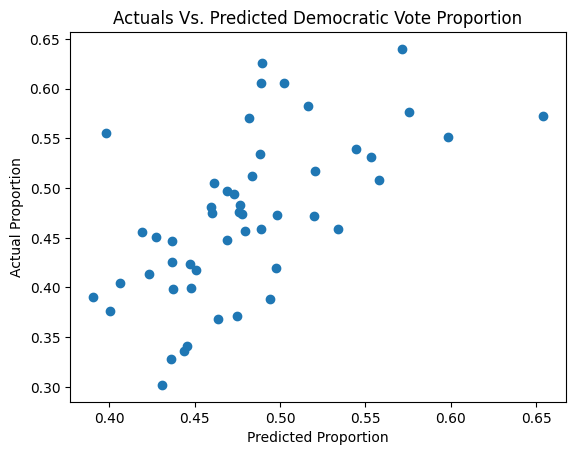

In [83]:
plt.scatter(y_pred, y_test)
plt.title('Actuals Vs. Predicted Democratic Vote Proportion')
plt.xlabel('Predicted Proportion')
plt.ylabel('Actual Proportion')

In [81]:
y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred)

In [82]:
results = pd.DataFrame({
    'actual': y_test_flat,
    'predicted': y_pred_flat,
    'error': np.abs(y_test_flat - y_pred_flat)
})
worst_preds = results.reindex(results['error'].abs().sort_values(ascending=False).index)
worst_preds.head()

,actual,predicted,error
20,0.555185,0.398168,0.157017
22,0.626381,0.489470,0.136911
44,0.301908,0.430887,0.128979
42,0.605775,0.488738,0.117038
39,0.327826,0.436039,0.108213
